# Project 2: Predicting House Prices with Linear Regression (Part 3 of 3)


> By:  Rohazeanti Mohamad Jenpire

---

## Table of Contents
- [Imports](#Imports)
- [Read Data](#Read-Data)
- [Feature Engineer: Train Data](#Feature-Engineering:-Train-Data)
- [Modelling](#Modelling)
- [Feature Engineer: Test Data](#Feature-Engineer:-Test-Data)
- [Inferential Visualizations](#Inferential-Visualizations)
- [Business Recommendations](#Business-Recommendations)

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error as mse, r2_score
import missingno as msno
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from math import sqrt
import pickle
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

pd.pandas.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

## Read Data

In [2]:
#read training data
train = pd.read_csv('datasets/train_clean.csv')

In [3]:
#print first first 5 row of train data
train.head()

,Id,MS Zoning,Land Contour,Lot Config,Neighborhood,Condition 1,Bldg Type,House Style,Overall Qual,Roof Style,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Foundation,Bsmt Qual,Total Bsmt SF,Heating QC,1st Flr SF,Gr Liv Area,Full Bath,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Area,Sale Type,SalePrice,Age_Built,Age_Remod,Age_Garage
0,109,RL,Lvl,CulDSac,Sawyer,RRAe,1Fam,2Story,6,Gable,HdBoard,Plywood,BrkFace,4,CBlock,3,725.0,5,725,1479,2,1,4,6,0,0,Attchd,2,2.0,475.0,WD,130500,34,5,34.0
1,544,RL,Lvl,CulDSac,SawyerW,Norm,1Fam,2Story,7,Gable,VinylSd,VinylSd,BrkFace,4,PConc,4,913.0,5,913,2122,2,1,4,8,1,3,Attchd,2,2.0,559.0,WD,220000,13,12,12.0
2,153,RL,Lvl,Inside,NAmes,Norm,1Fam,1Story,5,Gable,VinylSd,VinylSd,None,3,CBlock,3,1057.0,3,1057,1057,1,1,4,5,0,0,Detchd,1,1.0,246.0,WD,109000,57,3,57.0
3,318,RL,Lvl,Inside,Timber,Norm,1Fam,2Story,5,Gable,VinylSd,VinylSd,None,3,PConc,4,384.0,4,744,1444,2,1,3,7,0,0,BuiltIn,3,2.0,400.0,WD,174000,4,3,3.0
4,255,RL,Lvl,Inside,SawyerW,Norm,1Fam,1.5Fin,6,Gable,Wd Sdng,Plywood,None,3,PConc,2,676.0,3,831,1445,2,1,3,6,0,0,Detchd,1,2.0,484.0,WD,138500,110,17,53.0


In [4]:
#determine number of rows and columns in train dataset
train.shape

(1965, 35)

In [5]:
train_original = train

## Feature Engineering: Train Data

#### Train Test Split


In [4]:
X = train.drop(columns = ['SalePrice'])
y = train['SalePrice']

NameError: name 'train' is not defined

In [5]:
# define categorical and numerical features
categorical_features = X.select_dtypes(include = ['object']).columns
numerical_features = X.select_dtypes(include = ['float64', 'int64']).columns

NameError: name 'X' is not defined

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1375, 34), (590, 34), (1375,), (590,))

In [10]:
def show_vif(df):
    numerical_features = df.select_dtypes(include = ['float64', 'int64']).columns
    vif_data = pd.DataFrame()
    vif_data["feature"] = df[numerical_features].columns
    vif_data["VIF"] = [variance_inflation_factor(df[numerical_features].values, i) for i in range(len(df[numerical_features].columns))]
    return vif_data[(vif_data['VIF'] >10)]

In [11]:
show_vif(X_train)

,feature,VIF
1,Overall Qual,71.810202
2,Exter Qual,97.647213
3,Bsmt Qual,42.594742
4,Total Bsmt SF,36.070324
5,Heating QC,29.652200
6,1st Flr SF,49.222191
7,Gr Liv Area,54.710305
8,Full Bath,22.212824
9,Kitchen AbvGr,32.650302
10,Kitchen Qual,74.753389


In [12]:
to_drop = ['1st Flr SF', 'Garage Cars', 'Exter Qual',
           'Bsmt Qual', 'Kitchen Qual', 'Total Bsmt SF',
           'Heating QC', 'Full Bath']

X_train = X_train.drop(columns =to_drop)
X_test = X_test.drop(columns =to_drop)

In [13]:
X_train.shape, X_test.shape

((1375, 26), (590, 26))

In [14]:
show_vif(X_train)

,feature,VIF
1,Overall Qual,30.202640
2,Gr Liv Area,46.880105
3,Kitchen AbvGr,25.835669
4,TotRms AbvGrd,63.789250
8,Garage Area,10.472291


In [15]:
X_train_before_fe = X_train
X_test_before_fe = X_test

#### Scaling: MinMaxScaler()

In [16]:
# define categorical and numerical features
categorical_features = X_train.select_dtypes(include = ['object']).columns
numerical_features = X_train.select_dtypes(include = ['float64', 'int64']).columns

In [17]:
#instantiate MinMaxScaler()
scaler = MinMaxScaler()

#fit train set
scaler.fit(X_train[numerical_features])

#transform train and test set
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

#### One Hot Encoding

In [18]:
# Concatenate X_train and X_test dataset for OHE
X_dummy = pd.concat([X_train, X_test], axis =0)

In [19]:
#instantiate OHE
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
trans = ColumnTransformer(transformers = [("cat", encoder, categorical_features)], remainder= 'passthrough')

#fit and transform 
X_dummy = trans.fit_transform(X_dummy)

In [20]:
#get new features of encoded features
new_features = trans.get_feature_names()
X_dummy = pd.DataFrame(X_dummy, columns=new_features)
X_dummy.head()

,cat__x0_A (agr),cat__x0_C (all),cat__x0_FV,cat__x0_I (all),cat__x0_RH,cat__x0_RL,cat__x0_RM,cat__x1_Bnk,cat__x1_HLS,cat__x1_Low,cat__x1_Lvl,cat__x2_Corner,cat__x2_CulDSac,cat__x2_FR2,cat__x2_FR3,cat__x2_Inside,cat__x3_Blmngtn,cat__x3_Blueste,cat__x3_BrDale,cat__x3_BrkSide,cat__x3_ClearCr,cat__x3_CollgCr,cat__x3_Crawfor,cat__x3_Edwards,cat__x3_Gilbert,cat__x3_Greens,cat__x3_GrnHill,cat__x3_IDOTRR,cat__x3_Landmrk,cat__x3_MeadowV,cat__x3_Mitchel,cat__x3_NAmes,cat__x3_NPkVill,cat__x3_NWAmes,cat__x3_NoRidge,cat__x3_NridgHt,cat__x3_OldTown,cat__x3_SWISU,cat__x3_Sawyer,cat__x3_SawyerW,cat__x3_Somerst,cat__x3_StoneBr,cat__x3_Timber,cat__x3_Veenker,cat__x4_Artery,cat__x4_Feedr,cat__x4_Norm,cat__x4_PosA,cat__x4_PosN,cat__x4_RRAe,cat__x4_RRAn,cat__x4_RRNe,cat__x4_RRNn,cat__x5_1Fam,cat__x5_2fmCon,cat__x5_Duplex,cat__x5_Twnhs,cat__x5_TwnhsE,cat__x6_1.5Fin,cat__x6_1.5Unf,cat__x6_1Story,cat__x6_2.5Fin,cat__x6_2.5Unf,cat__x6_2Story,cat__x6_SFoyer,cat__x6_SLvl,cat__x7_Flat,cat__x7_Gable,cat__x7_Gambrel,cat__x7_Hip,cat__x7_Mansard,cat__x7_Shed,cat__x8_AsbShng,cat__x8_AsphShn,cat__x8_BrkComm,cat__x8_BrkFace,cat__x8_CBlock,cat__x8_CemntBd,cat__x8_HdBoard,cat__x8_ImStucc,cat__x8_MetalSd,cat__x8_Plywood,cat__x8_Stone,cat__x8_Stucco,cat__x8_VinylSd,cat__x8_Wd Sdng,cat__x8_WdShing,cat__x9_AsbShng,cat__x9_AsphShn,cat__x9_Brk Cmn,cat__x9_BrkFace,cat__x9_CBlock,cat__x9_CmentBd,cat__x9_HdBoard,cat__x9_ImStucc,cat__x9_MetalSd,cat__x9_Plywood,cat__x9_Stone,cat__x9_Stucco,cat__x9_VinylSd,cat__x9_Wd Sdng,cat__x9_Wd Shng,cat__x10_BrkCmn,cat__x10_BrkFace,cat__x10_None,cat__x10_Stone,cat__x11_BrkTil,cat__x11_CBlock,cat__x11_PConc,cat__x11_Slab,cat__x11_Stone,cat__x11_Wood,cat__x12_2Types,cat__x12_Attchd,cat__x12_Basment,cat__x12_BuiltIn,cat__x12_CarPort,cat__x12_Detchd,cat__x12_None,cat__x13_COD,cat__x13_CWD,cat__x13_Con,cat__x13_ConLD,cat__x13_ConLI,cat__x13_ConLw,cat__x13_New,cat__x13_Oth,cat__x13_WD,Id,Overall Qual,Gr Liv Area,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Finish,Garage Area,Age_Built,Age_Remod,Age_Garage
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.384011,0.777778,0.659185,0.333333,0.5,0.25,0.8,1.000000,0.636225,0.007752,0.016667,0.008850
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.531944,0.777778,0.482128,0.333333,0.2,0.25,0.8,1.000000,0.366819,0.000000,0.016667,0.008850
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.304066,0.555556,0.241064,0.333333,0.2,0.00,0.0,1.000000,0.399543,0.031008,0.050000,0.035398
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [21]:
X_dummy.shape

(1965, 140)

In [22]:
X_train_before_fe.shape, X_test_before_fe.shape

((1375, 26), (590, 26))

In [23]:
X_train = X_dummy[:1375]
X_test = X_dummy[1375:]

In [24]:
X_train.shape, X_test.shape

((1375, 140), (590, 140))

#### Polynomial Features

In [25]:
#Instantiate PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [26]:
# Engineering features on training dataset
X_poly_train = poly.fit_transform(X_train)

In [27]:
# Engineering features on testing dataset
X_poly_test = poly.fit_transform(X_test)

## Modelling

In [28]:
# Plot residuals
def plot_residuals(y_train_pred, y_test_pred, y_train, y_test):
    plt.figure(figsize=(8,3))
    plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
    plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
    plt.title("Residuals")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc = "upper left")
    plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
    plt.show()

# Plot predictions
def plot_predictions(y_train_pred, y_test_pred, y_train, y_test):
    plt.figure(figsize=(8,3))
    plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
    plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
    plt.title("Predictions")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
    plt.show();

In [29]:
# Plot important coefficients
def plot_impt_coef(X_train, model):
    coefs = pd.Series(model.coef_, index = X_train.columns)
    print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
          str(sum(coefs == 0)) + " features")
    imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
    plt.figure(figsize=(10,5))
    imp_coefs.plot(kind = "barh")
    plt.title("Coefficients in the Ridge Model")
    plt.show()

In [30]:
#graph predict vs true
def predict_vs_true(X_test,y_test, y_test_pred):
    #plot predicted vs true value
    plt.figure(figsize=(8,3))
    plt.scatter(range(0,len(X_test)), y_test_pred,color="green",label="predicted")
    plt.scatter(range(0,len(X_test)), y_test,color="blue",label="True value")
    plt.legend()
    plt.show();

In [31]:
#Linearity & normality
def linearity_normality(y_test_pred, y_test):
    sns.set_style("whitegrid", {'axes.grid' : False})
    fig, axes = plt.subplots(1, 2, figsize = (15,5))
    sns.regplot(ax=axes[0],x=y_test_pred, y=y_test, lowess=True, line_kws={'color': 'red'}).set_title('Observed vs. Predicted Values')
    resids = y_test - y_test_pred
    sns.histplot(resids, bins = 50, kde= True, ax=axes[1]).set_title('Residuals');

    #E - Equal variance of errors 
def equal_variance_error(y_test_pred, y_test):
    resids = y_test - y_test_pred
    plt.scatter(y_test_pred, resids, s=1)
    plt.axhline(0,color ='orange');

In [32]:
def best_params(X, y):
    
    # Initialze the estimators
    model1 = LinearRegression()
    model2 = Ridge()
    model3 = Lasso() 
    
    # Initialize the hyperparameters for each dictionary
    param1 = {}
    param1['classifier'] = [model1]

    param2 = {}
    param2['classifier__alpha'] = [0.01, 0.1, 1, 10, 100, 1000, 10000]
    param2['classifier'] = [model2]

    param3 = {}
    param3['classifier__alpha'] = [0.01, 0.1, 1, 10, 100, 1000, 10000]
    param3['classifier'] = [model3]
    
    # create pipeline
    pipeline = Pipeline([('classifier', model1)])
    params = [param1, param2, param3]
    
    ###### run GridsearchCV
    gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    gs.fit(X, y) 
    
    return gs.best_params_

In [33]:
def model_evaluation(y_train_pred,y_test_pred,y_train,y_test):
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    perc_diff = (mse_train - mse_test)/mse_train * 100
    print('MSE train: ',mse_train)
    print('MSE test: ',mse_test)
    print('Difference', str(perc_diff)+'%')

In [34]:
X_train.shape, y_train.shape

((1375, 140), (1375,))

#### Model without Polynomial Feature

In [35]:
best_params(X_train, y_train)

{'classifier': Ridge(alpha=1), 'classifier__alpha': 1}

In [36]:
#fit linear regression
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

#evaluate model
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)
model_evaluation(y_train_pred_lr,y_test_pred_lr,y_train,y_test)

MSE train:  452534404.51854545
MSE test:  6.62961469959545e+31
Difference -1.464996834140985e+25%


**Comments:**
- Baseline model(Linear Regression) is not reliable as the value of MSE test data is small and this cannot be used for baseline score.

In [37]:
#fit Lasso
lasso = Lasso(alpha=500)
lasso_model = lasso.fit(X_train, y_train)

#evaluate model
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)
model_evaluation(y_train_pred_lasso,y_test_pred_lasso,y_train,y_test)

MSE train:  639831866.4155787
MSE test:  667132691.8220859
Difference -4.266874915038213%


In [38]:
#fit Ridge
ridge = Ridge(alpha=11)
ridge_model = ridge.fit(X_train, y_train)

#evaluate model
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)
model_evaluation(y_train_pred_ridge,y_test_pred_ridge,y_train,y_test)

MSE train:  548958576.7995347
MSE test:  576107443.9369675
Difference -4.945521991060333%


**Comments:**:
- Ridge model gave a better MSE difference with smaller alpha <--selected model

#### Model with Polynomial Features

In [39]:
best_params(X_poly_train, y_train)

{'classifier': Lasso(alpha=100), 'classifier__alpha': 100}

In [40]:
#fit linear regression
lr_poly = LinearRegression()
lr_model_poly = lr_poly.fit(X_poly_train, y_train)
y_train_pred_lr_poly = lr_model_poly.predict(X_poly_train)
y_test_pred_lr_poly = lr_model_poly.predict(X_poly_test)
model_evaluation(y_train_pred_lr_poly,y_test_pred_lr_poly,y_train,y_test)

MSE train:  1.0665872225827529e-14
MSE test:  278634480684411.44
Difference -2.61239282437394e+30%


In [41]:
#fit Lasso
lasso_poly = Lasso(alpha=1100)
lasso_model_poly = lasso_poly.fit(X_poly_train, y_train)

#evaluate model
y_train_pred_poly = lasso_model_poly.predict(X_poly_train)
y_test_pred_poly = lasso_model_poly.predict(X_poly_test)
model_evaluation(y_train_pred_poly,y_test_pred_poly,y_train,y_test)

MSE train:  647651714.6032273
MSE test:  678408467.9098232
Difference -4.748965008984578%


In [42]:
#fit Ridge
ridge_poly = Ridge(alpha=5000)
ridge_model_poly = ridge_poly.fit(X_poly_train, y_train)

#evaluate model
y_train_pred_ridge_poly = ridge_model_poly.predict(X_poly_train)
y_test_pred_ridge_poly = ridge_model_poly.predict(X_poly_test)
model_evaluation(y_train_pred_ridge_poly,y_test_pred_ridge_poly,y_train,y_test)

MSE train:  1548619652.8210332
MSE test:  1612228079.809647
Difference -4.107427338452148%


**Comments:**
-Lasso and Ridge model require high alpha to achieve MSE difference of <5% which leads to serious underfitting of the model. 

## Inferential Visualizations

#### Visualisations for Lasso Model

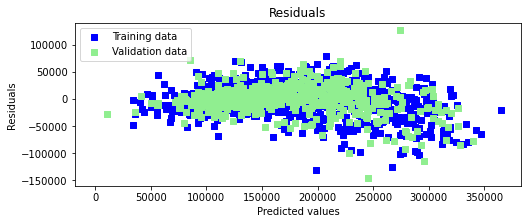

In [43]:
plot_residuals(y_train_pred_lasso, y_test_pred_lasso, y_train, y_test)

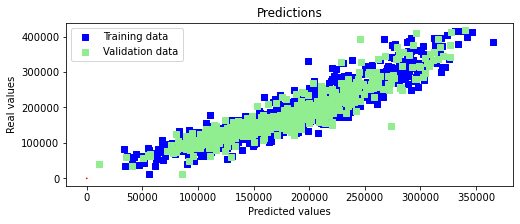

In [44]:
plot_predictions(y_train_pred_lasso, y_test_pred_lasso, y_train, y_test)

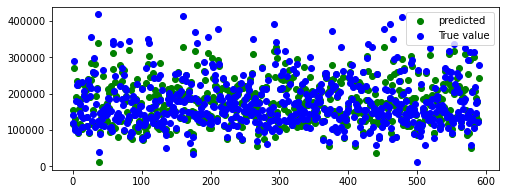

In [45]:
predict_vs_true(X_test, y_test, y_test_pred_lasso)

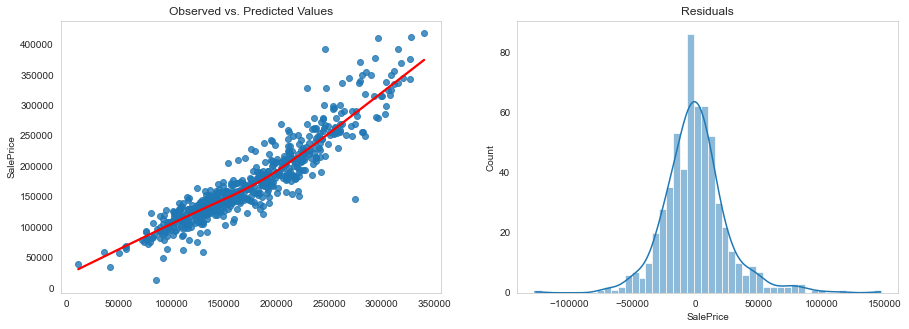

In [46]:
linearity_normality(y_test_pred_lasso, y_test)

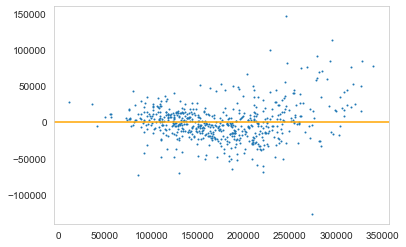

In [47]:
equal_variance_error(y_test_pred_lasso, y_test)

In [48]:
list(zip(lasso.coef_, X_train.columns))
lasso_coef = pd.DataFrame({'coef': lasso.coef_, 'category': X_train.columns}).\
sort_values(by = 'coef', ascending = False).set_index('category')

In [49]:
lasso_coef.head(10)

,coef
category,
Gr Liv Area,121757.771863
Overall Qual,118387.123354
Garage Area,45600.983455
cat__x3_NridgHt,26529.499706
Fireplace Qu,17274.106948
cat__x5_1Fam,9800.669598
cat__x11_PConc,8872.330976
cat__x6_1Story,8122.862467
cat__x13_New,7724.708111


In [50]:
lasso_coef.tail(10)

,coef
category,
cat__x12_Detchd,-141.775469
cat__x7_Gable,-1224.699281
cat__x3_OldTown,-1288.129569
cat__x3_Gilbert,-2380.576581
cat__x0_RM,-3570.816113
cat__x6_2Story,-3685.623058
cat__x10_None,-4038.997731
cat__x1_Lvl,-4059.420886
Age_Built,-16952.720046


Ridge picked 28 features and eliminated the other 112 features


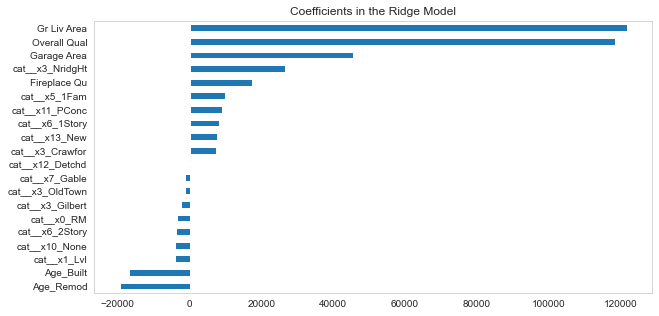

In [51]:
plot_impt_coef(X_train, lasso)

**Comments:**
- Lasso model is able to provide accurate prediction for houses between $100,000 to $200,000. 
- Important features picked amongst others are Gr Living Area, Overall Qual, Garage Area, Fireplace Quality, Age of the house and Age Remodel.

#### Visualisations for Ridge Model

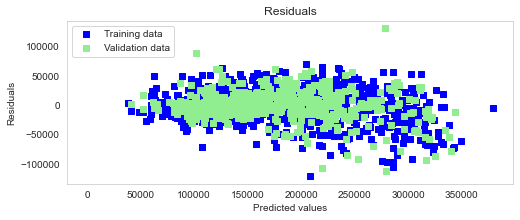

In [52]:
plot_residuals(y_train_pred_ridge, y_test_pred_ridge, y_train, y_test)

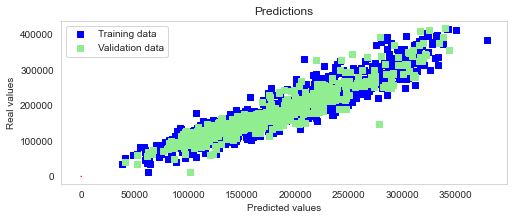

In [53]:
plot_predictions(y_train_pred_ridge, y_test_pred_ridge, y_train, y_test)

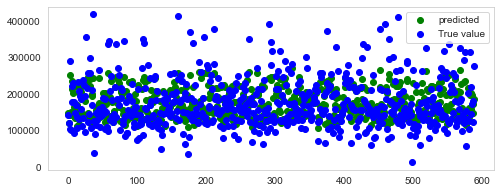

In [54]:
predict_vs_true(X_test, y_test, y_test_pred_ridge_poly)

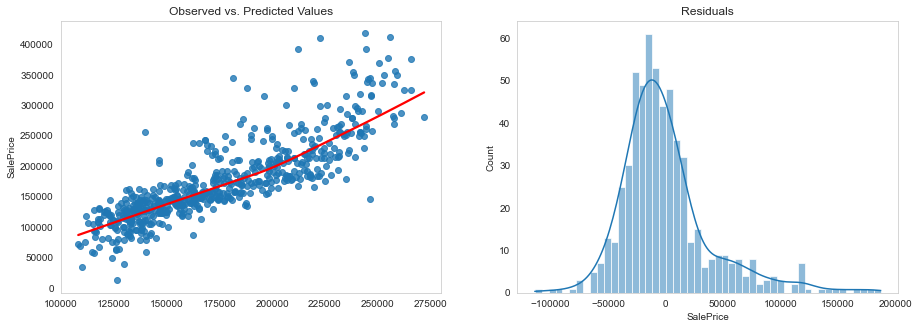

In [55]:
linearity_normality(y_test_pred_ridge_poly, y_test)

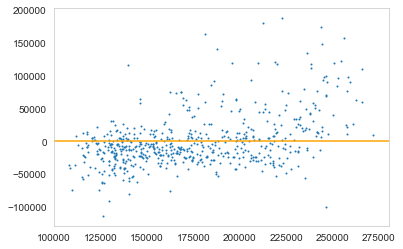

In [56]:
equal_variance_error(y_test_pred_ridge_poly, y_test)

In [57]:
list(zip(ridge.coef_, X_train.columns))
ridge_coef = pd.DataFrame({'coef': ridge.coef_, 'category': X_train.columns}).\
sort_values(by = 'coef', ascending = False).set_index('category')

In [58]:
ridge_coef.head(10)

,coef
category,
Gr Liv Area,86693.046144
Overall Qual,72213.869321
Garage Area,47164.953399
cat__x3_NridgHt,30866.228871
cat__x3_NoRidge,23905.716611
Fireplaces,16758.850149
TotRms AbvGrd,16587.846178
cat__x3_StoneBr,16448.736220
cat__x3_GrnHill,15640.789064


In [59]:
ridge_coef.tail(10)

,coef
category,
cat__x10_BrkCmn,-9094.318655
cat__x13_COD,-9420.353988
cat__x3_NAmes,-11159.927034
cat__x3_Edwards,-11293.831787
cat__x5_Twnhs,-11604.151862
cat__x11_Slab,-11761.111139
cat__x3_Blmngtn,-12533.266716
cat__x3_Gilbert,-17921.924974
Age_Remod,-21633.165260


Ridge picked 137 features and eliminated the other 3 features


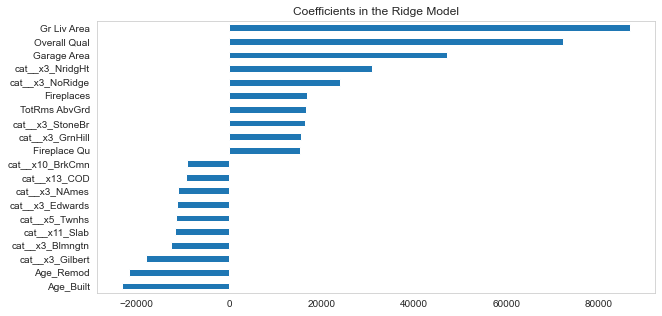

In [60]:
plot_impt_coef(X_train, ridge)

- Ridge model is able to provide accurate prediction for houses between $100,000 to $200,000. 
- Important features picked amongst others are Gr Living Area, Overall Qual, Garage Area, Presence of Fireplace, Total number of rooms, Age of the house and Age Remodel.

### Import Test Data

In [61]:
# Import cleaned testset and save IDs separately
train_final = pd.read_csv('./datasets/train_clean.csv')
test_ids = pd.read_csv('./datasets/test_clean.csv')['Id']
test_final=pd.read_csv('./datasets/test_clean.csv')

In [62]:
train_final.shape, test_final.shape

((1965, 35), (878, 26))

In [63]:
train_col = list(train_final.columns)
test_col = list(test_final.columns)
train_saleprice_col = train_final['SalePrice']

In [64]:
def intersection(list1, list2):
    return list(set(list1) & set(list2))

In [65]:
final_list = intersection(train_col, test_col)

In [66]:
train_final = train_final[final_list]
train_final['SalePrice'] = train_saleprice_col
test_final = test_final[final_list]

In [67]:
train_final.shape, test_final.shape

((1965, 27), (878, 26))

In [68]:
test_final.head()

,Id,Foundation,House Style,Exterior 1st,Age_Garage,Fireplaces,Neighborhood,Condition 1,Garage Type,Garage Finish,Garage Area,Land Contour,Sale Type,Kitchen AbvGr,Lot Config,Gr Liv Area,Overall Qual,Exterior 2nd,TotRms AbvGrd,Age_Remod,Roof Style,Mas Vnr Type,Age_Built,Bldg Type,MS Zoning,Fireplace Qu
0,2658,Stone,2Story,AsbShng,96.0,0,OldTown,Norm,Detchd,1,440,Lvl,WD,2,Inside,1928,6,AsbShng,9,56,Gable,None,96,2fmCon,RM,0
1,2718,CBlock,1Story,Plywood,29.0,0,Sawyer,Norm,Attchd,3,580,Lvl,WD,2,Inside,1967,5,Plywood,10,29,Gable,None,29,Duplex,RL,0
2,2414,PConc,2Story,VinylSd,1.0,1,Gilbert,Norm,Attchd,2,426,Lvl,New,1,Inside,1496,7,VinylSd,7,1,Gable,None,0,1Fam,RL,4
3,1989,CBlock,1Story,Wd Sdng,72.0,0,OldTown,Norm,Detchd,1,480,Lvl,WD,1,Inside,968,5,Wd Sdng,5,1,Gable,None,84,1Fam,RM,0
4,625,CBlock,1Story,Plywood,46.0,2,NAmes,Norm,Attchd,2,514,Lvl,WD,1,Inside,1394,6,Plywood,6,46,Gable,BrkFace,46,1Fam,RL,4


## Feature Engineer: Test Data

In [69]:
X_train_final = train_final.drop(columns = ['SalePrice'])
X_test_final = test_final                    
y_train_final = train_final['SalePrice']

#### Scaling: MinMaxScaler()

In [70]:
# define categorical and numerical features
categorical_features = X_train_final.select_dtypes(include = ['object']).columns
numerical_features = X_train_final.select_dtypes(include = ['float64', 'int64']).columns

In [71]:
#instantiate MinMaxScaler()
scaler = MinMaxScaler()

#fit train set
scaler.fit(X_train_final[numerical_features])

#transform test set
X_test_final[numerical_features] = scaler.transform(X_test_final[numerical_features])

#### One Hot Encoding

In [72]:
# Concatenate X_train and X_test dataset for OHE
X_dummy = pd.concat([X_train_final, X_test_final], axis =0)

In [73]:
#instantiate OHE
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
trans = ColumnTransformer(transformers = [("cat", encoder, categorical_features)], remainder= 'passthrough')

#fit and transform 
X_dummy = trans.fit_transform(X_dummy)

In [74]:
#get new features of encoded features
new_features = trans.get_feature_names()
X_dummy = pd.DataFrame(X_dummy, columns=new_features)
X_dummy.head()

,cat__x0_BrkTil,cat__x0_CBlock,cat__x0_PConc,cat__x0_Slab,cat__x0_Stone,cat__x0_Wood,cat__x1_1.5Fin,cat__x1_1.5Unf,cat__x1_1Story,cat__x1_2.5Fin,cat__x1_2.5Unf,cat__x1_2Story,cat__x1_SFoyer,cat__x1_SLvl,cat__x2_AsbShng,cat__x2_AsphShn,cat__x2_BrkComm,cat__x2_BrkFace,cat__x2_CBlock,cat__x2_CemntBd,cat__x2_HdBoard,cat__x2_ImStucc,cat__x2_MetalSd,cat__x2_Plywood,cat__x2_PreCast,cat__x2_Stone,cat__x2_Stucco,cat__x2_VinylSd,cat__x2_Wd Sdng,cat__x2_WdShing,cat__x3_Blmngtn,cat__x3_Blueste,cat__x3_BrDale,cat__x3_BrkSide,cat__x3_ClearCr,cat__x3_CollgCr,cat__x3_Crawfor,cat__x3_Edwards,cat__x3_Gilbert,cat__x3_Greens,cat__x3_GrnHill,cat__x3_IDOTRR,cat__x3_Landmrk,cat__x3_MeadowV,cat__x3_Mitchel,cat__x3_NAmes,cat__x3_NPkVill,cat__x3_NWAmes,cat__x3_NoRidge,cat__x3_NridgHt,cat__x3_OldTown,cat__x3_SWISU,cat__x3_Sawyer,cat__x3_SawyerW,cat__x3_Somerst,cat__x3_StoneBr,cat__x3_Timber,cat__x3_Veenker,cat__x4_Artery,cat__x4_Feedr,cat__x4_Norm,cat__x4_PosA,cat__x4_PosN,cat__x4_RRAe,cat__x4_RRAn,cat__x4_RRNe,cat__x4_RRNn,cat__x5_2Types,cat__x5_Attchd,cat__x5_Basment,cat__x5_BuiltIn,cat__x5_CarPort,cat__x5_Detchd,cat__x5_None,cat__x6_Bnk,cat__x6_HLS,cat__x6_Low,cat__x6_Lvl,cat__x7_COD,cat__x7_CWD,cat__x7_Con,cat__x7_ConLD,cat__x7_ConLI,cat__x7_ConLw,cat__x7_New,cat__x7_Oth,cat__x7_VWD,cat__x7_WD,cat__x8_Corner,cat__x8_CulDSac,cat__x8_FR2,cat__x8_FR3,cat__x8_Inside,cat__x9_AsbShng,cat__x9_AsphShn,cat__x9_Brk Cmn,cat__x9_BrkFace,cat__x9_CBlock,cat__x9_CmentBd,cat__x9_HdBoard,cat__x9_ImStucc,cat__x9_MetalSd,cat__x9_Other,cat__x9_Plywood,cat__x9_PreCast,cat__x9_Stone,cat__x9_Stucco,cat__x9_VinylSd,cat__x9_Wd Sdng,cat__x9_Wd Shng,cat__x10_Flat,cat__x10_Gable,cat__x10_Gambrel,cat__x10_Hip,cat__x10_Mansard,cat__x10_Shed,cat__x11_BrkCmn,cat__x11_BrkFace,cat__x11_CBlock,cat__x11_None,cat__x11_Stone,cat__x12_1Fam,cat__x12_2fmCon,cat__x12_Duplex,cat__x12_Twnhs,cat__x12_TwnhsE,cat__x13_A (agr),cat__x13_C (all),cat__x13_FV,cat__x13_I (all),cat__x13_RH,cat__x13_RL,cat__x13_RM,Id,Age_Garage,Fireplaces,Garage Finish,Garage Area,Kitchen AbvGr,Gr Liv Area,Overall Qual,TotRms AbvGrd,Age_Remod,Age_Built,Fireplace Qu
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,109.0,34.0,0.0,2.0,475.0,1.0,1479.0,6.0,6.0,5.0,34.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,544.0,12.0,1.0,2.0,559.0,1.0,2122.0,7.0,8.0,12.0,13.0,3.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,153.0,57.0,0.0,1.0,246.0,1.0,1057.0,5.0,5.0,3.0,57.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

In [75]:
X_train_final = X_dummy[:1965]
X_test_final = X_dummy[1965:]

In [76]:
X_test_final.head()

,cat__x0_BrkTil,cat__x0_CBlock,cat__x0_PConc,cat__x0_Slab,cat__x0_Stone,cat__x0_Wood,cat__x1_1.5Fin,cat__x1_1.5Unf,cat__x1_1Story,cat__x1_2.5Fin,cat__x1_2.5Unf,cat__x1_2Story,cat__x1_SFoyer,cat__x1_SLvl,cat__x2_AsbShng,cat__x2_AsphShn,cat__x2_BrkComm,cat__x2_BrkFace,cat__x2_CBlock,cat__x2_CemntBd,cat__x2_HdBoard,cat__x2_ImStucc,cat__x2_MetalSd,cat__x2_Plywood,cat__x2_PreCast,cat__x2_Stone,cat__x2_Stucco,cat__x2_VinylSd,cat__x2_Wd Sdng,cat__x2_WdShing,cat__x3_Blmngtn,cat__x3_Blueste,cat__x3_BrDale,cat__x3_BrkSide,cat__x3_ClearCr,cat__x3_CollgCr,cat__x3_Crawfor,cat__x3_Edwards,cat__x3_Gilbert,cat__x3_Greens,cat__x3_GrnHill,cat__x3_IDOTRR,cat__x3_Landmrk,cat__x3_MeadowV,cat__x3_Mitchel,cat__x3_NAmes,cat__x3_NPkVill,cat__x3_NWAmes,cat__x3_NoRidge,cat__x3_NridgHt,cat__x3_OldTown,cat__x3_SWISU,cat__x3_Sawyer,cat__x3_SawyerW,cat__x3_Somerst,cat__x3_StoneBr,cat__x3_Timber,cat__x3_Veenker,cat__x4_Artery,cat__x4_Feedr,cat__x4_Norm,cat__x4_PosA,cat__x4_PosN,cat__x4_RRAe,cat__x4_RRAn,cat__x4_RRNe,cat__x4_RRNn,cat__x5_2Types,cat__x5_Attchd,cat__x5_Basment,cat__x5_BuiltIn,cat__x5_CarPort,cat__x5_Detchd,cat__x5_None,cat__x6_Bnk,cat__x6_HLS,cat__x6_Low,cat__x6_Lvl,cat__x7_COD,cat__x7_CWD,cat__x7_Con,cat__x7_ConLD,cat__x7_ConLI,cat__x7_ConLw,cat__x7_New,cat__x7_Oth,cat__x7_VWD,cat__x7_WD,cat__x8_Corner,cat__x8_CulDSac,cat__x8_FR2,cat__x8_FR3,cat__x8_Inside,cat__x9_AsbShng,cat__x9_AsphShn,cat__x9_Brk Cmn,cat__x9_BrkFace,cat__x9_CBlock,cat__x9_CmentBd,cat__x9_HdBoard,cat__x9_ImStucc,cat__x9_MetalSd,cat__x9_Other,cat__x9_Plywood,cat__x9_PreCast,cat__x9_Stone,cat__x9_Stucco,cat__x9_VinylSd,cat__x9_Wd Sdng,cat__x9_Wd Shng,cat__x10_Flat,cat__x10_Gable,cat__x10_Gambrel,cat__x10_Hip,cat__x10_Mansard,cat__x10_Shed,cat__x11_BrkCmn,cat__x11_BrkFace,cat__x11_CBlock,cat__x11_None,cat__x11_Stone,cat__x12_1Fam,cat__x12_2fmCon,cat__x12_Duplex,cat__x12_Twnhs,cat__x12_TwnhsE,cat__x13_A (agr),cat__x13_C (all),cat__x13_FV,cat__x13_I (all),cat__x13_RH,cat__x13_RL,cat__x13_RM,Id,Age_Garage,Fireplaces,Garage Finish,Garage Area,Kitchen AbvGr,Gr Liv Area,Overall Qual,TotRms AbvGrd,Age_Remod,Age_Built,Fireplace Qu
1965,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.907072,0.842105,0.00,0.333333,0.334855,0.666667,0.621685,0.555556,0.636364,0.933333,0.705882,0.0
1966,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.927571,0.254386,0.00,1.000000,0.441400,0.666667,0.636895,0.444444,0.727273,0.483333,0.213235,0.0
1967,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.823710,0.008772,0.25,0.666667,0.324201,0.333333,0.453198,0.666667,0.454545,0.016

### Predict Test Data

#### Lasso

In [77]:
#fit Lasso
lasso_model = lasso.fit(X_train_final, y_train_final)

#evaluate model
final_predictions_lasso = lasso_model.predict(X_test_final)

In [78]:
final_predictions_lasso.shape

(878,)

In [79]:
#create csv for submission
sub_lasso = pd.DataFrame()
sub_lasso['Id'] = test_ids
sub_lasso['SalePrice'] = final_predictions_lasso
sub_lasso.to_csv('./datasets/submission_lasso.csv',index=False)

In [80]:
print('Private: 188911.90898')
print('Public score: 187651.04414')

Private: 188911.90898
Public score: 187651.04414


#### Ridge

In [81]:
#fit Ridge
ridge_model = ridge.fit(X_train_final, y_train_final)

#evaluate model
final_predictions_ridge = ridge_model.predict(X_test_final)

In [82]:
final_predictions_ridge.shape

(878,)

In [83]:
#create csv for submission
sub_ridge = pd.DataFrame()
sub_ridge['Id'] = test_ids
sub_ridge['SalePrice'] = final_predictions_ridge
sub_ridge.to_csv('./datasets/submission_ridge.csv',index=False)

In [84]:
print('Private: 174233.22964')
print('Public score: 173584.05062')

Private: 174233.22964
Public score: 173584.05062


**Comments:**
- Based on the submissions of the two models(not polynomial) to Kaggle, Ridge model have a better RMSE score as compared to Lasso. 

## Business Recommendations

Based on our winning model - Ridge, real estate agents can predict and propose price of property to home buyers using these features:

- Neighborhood
- Overall quality of the house
- Size of the garage
- Fireplaces
- Total Number of rooms above ground
- Fireplace quality
- Age of house
- Age of house remodelling
- Gr Liv Area

While there are other analysis tool for agents to predict houses, those tools only allow selection of limited and basic features such as number of bed, type of house which you can normally expect. With our model, there are more features used to predict.

Agents may use our model as a complementary tool on top of other analysis tool such as Comparative Market Analysis (CMA) reports

**Limitations**

While this model generalizes well to the city of Ames, it's not generalizable to other cities, given that each city tends to differ greatly in terms of external factors like geographical features, seasonal weather or the economic climate of that particular city.

Another point to keep in mind that this model doesn't consider the inflation of housing prices. Since the end of the financial crisis in 2008, housing prices throughout the US have been increasing steadily year over year. Our model would need significant retraining to predict the current house prices in Ames today. 

Prices do not take into consideration of social factors (i.e. crime rates,  demographics in the neighborhood)

**Future project considerations:**
- Feature importance - Provide coefficients of features to identify important features. 
- Property survey portfolio: Property surveyor to evaluate the price of houses.
- Extend to banks to establish the asset value of the houses